In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [60]:
milk_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\monthly-milk-production-pounds-p.csv') 
milk_df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [61]:
y = milk_df['Milk']

y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((156,), (12,))

### Normal Checking Stationality

In [62]:
adfuller_result = adfuller(y, maxlag=10)

print('Add fuller p-value: ', adfuller_result[1])
if adfuller_result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

Add fuller p-value:  0.6443832606930102
The series is not stationary.


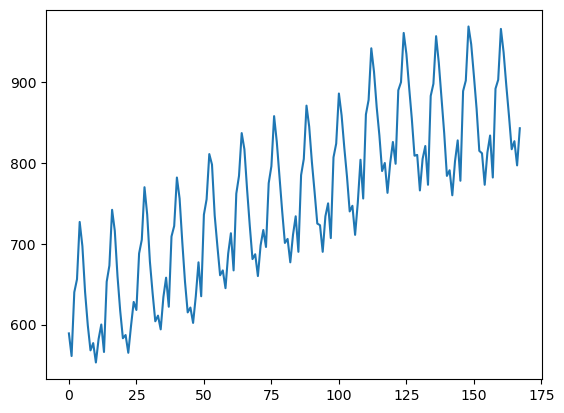

In [63]:
y.plot()
plt.show()

### Checking Stationality Using Differencing

#### 1st order differencing


if 1st order  differencing is not sufficient then do 2nd order, 3rd order... until it gets stationary

In [64]:
y.diff()

0       NaN
1     -28.0
2      79.0
3      16.0
4      71.0
       ... 
163   -38.0
164   -41.0
165    10.0
166   -30.0
167    46.0
Name: Milk, Length: 168, dtype: float64

The series is stationary.


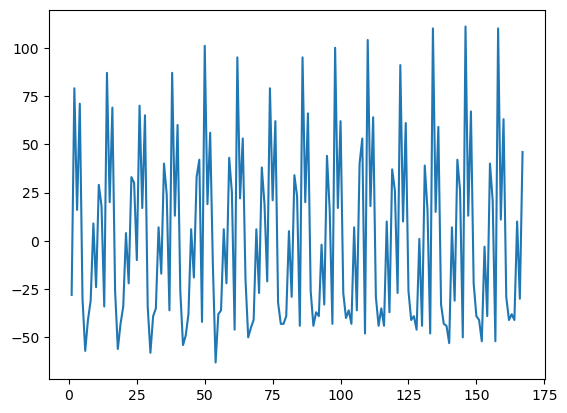

In [71]:
adfuller_result = adfuller(y.diff()[1:], maxlag=10)

if adfuller_result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


y.diff()[1:].plot()
plt.show()

##### 2nd order differencing

The series is stationary.


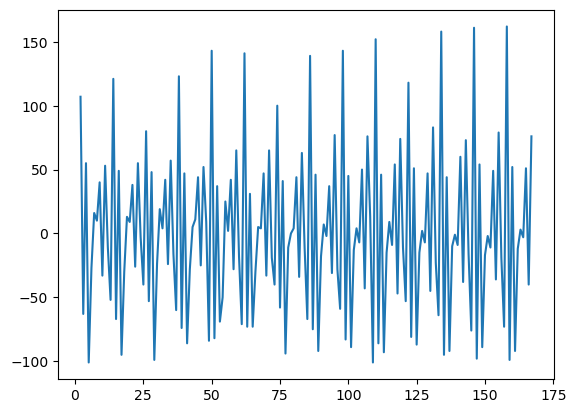

In [70]:
adfuller_result = adfuller(y.diff().diff()[2:], maxlag=10)

if adfuller_result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


y.diff().diff()[2:].plot()
plt.show()

### Correlation Types Comparison

| **Feature** | **Pearson Correlation** | **Autocorrelation** |
|------------|-------------------------|---------------------|
| **Definition** | Measures the linear relationship between two variables | Measures correlation of a series with its own past values |
| **Usage** | Assesses the relationship between different variables | Assesses internal dependencies in time series data |
| **Values** | Ranges from -1 to 1 | Ranges from -1 to 1 |
| **Application** | Used in general statistics | Used in time series analysis |
| **Formula** | $$r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}$$ | $$\rho_k = \frac{\text{Cov}(y_t, y_{t-k})}{\text{Var}(y_t)}$$ |
 

### Checking Stationality Using Lag

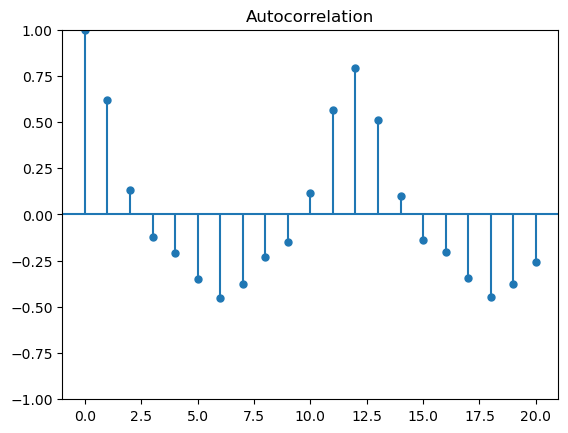

In [85]:
from statsmodels.graphics.tsaplots import plot_acf

i = 20
plot_acf(y, lags=i, alpha=None)
plt.show()


In [79]:
coal_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\Coal Consumption.csv')
coal_df.head()

,Month,Amount
0,1/1/1990,16.50
1,2/1/1990,15.17
2,3/1/1990,12.75
3,4/1/1990,12.31
4,5/1/1990,8.34


In [80]:
y = coal_df['Amount']

<Figure size 500x500 with 0 Axes>

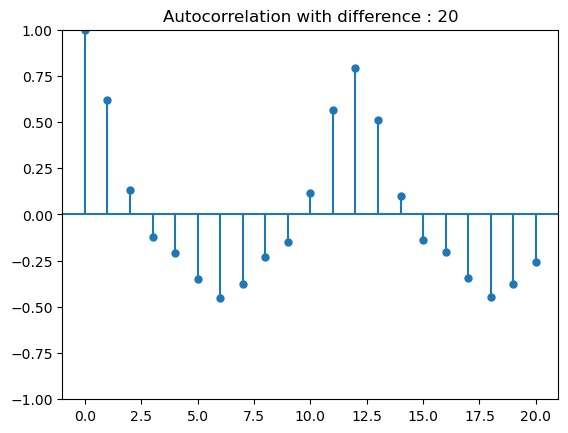

In [86]:
from statsmodels.graphics.tsaplots import plot_acf

i = 20
plt.figure(figsize=(5,5))
plot_acf(y, lags=i, alpha=None,title=f'Autocorrelation with difference : {i}')
plt.show()
